<a href="https://colab.research.google.com/github/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/blob/main/Analisis_del_consumo_del_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección nueva

# **Proyecto Final - Visualizaciones en Python**

Primera Entrega




# Sección nueva

# Abstract

Analisis de consumo de Cafe

El dataset seleccionado de Kaggle contiene el analisis del consumo de cafe , el mismo fue modificado utilizando datos del consumo de Argentina


Preguntas

1-Cual es el medio de Pago mas utilizado
2-Cual es la hora del dia que mas se consume cafe
3-Cual es la Bebida mas elegidas segun los consumidores


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Data science/DATA SET CAFE.csv',sep=";")
df.columns = df.columns.str.strip()
print(df.columns.tolist())
modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())


['Hora del dia', 'Tipo de Tienda', 'Medio de pago', 'precio', 'Nombre del Café', 'Momento del dia', 'Dia de la semana', 'Mes', 'Dia', 'Num de Mes', 'Date', 'Profesion']
0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia  Num de Mes  \
0           Latte         Morning              Fri  Mar    5           3   
1   Hot Chocolate       Afternoon              Fri  Mar    5           3   
2   Hot Chocolate       Afternoon              Fri  Mar    5           3   
3       Americano       Afternoon              Fri  Mar    5           3   
4           Latte     

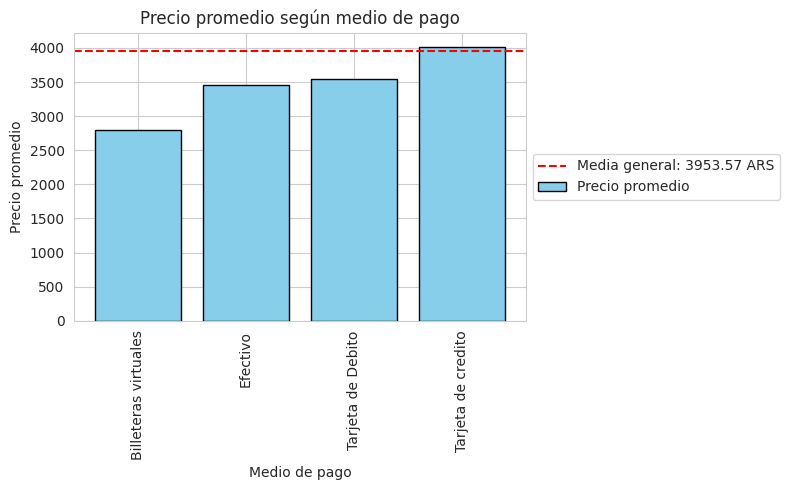

=== Resumen del gráfico de precio promedio por medio de pago ===
Precio promedio general: 3953.57 ARS
Medio de pago con mayor precio promedio: Tarjeta de credito (4020.02 ARS)
Medio de pago con menor precio promedio: Billeteras virtuales (2795.49 ARS)

Promedios por medio de pago:
Medio de pago
Billeteras virtuales    2795.488722
Efectivo                3450.617284
Tarjeta de Debito       3542.857143
Tarjeta de credito      4020.018309
Name: precio, dtype: float64


In [30]:
promedios = df.groupby("Medio de pago")["precio"].mean()
media_general = df["precio"].mean()

plt.figure(figsize=(8,5))
bars = plt.bar(promedios.index, promedios.values, color="skyblue", edgecolor="black", label="Precio promedio")
plt.axhline(media_general, color="red", linestyle="--", label=f"Media general: {media_general:.2f} ARS")
plt.title("Precio promedio según medio de pago")
plt.xlabel("Medio de pago")
plt.ylabel("Precio promedio")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
medio_max = promedios.idxmax()
medio_min = promedios.idxmin()
precio_max = promedios.max()
precio_min = promedios.min()
promedio_general = df["precio"].mean()
print("=== Resumen del gráfico de precio promedio por medio de pago ===")
print(f"Precio promedio general: {promedio_general:.2f} ARS")
print(f"Medio de pago con mayor precio promedio: {medio_max} ({precio_max:.2f} ARS)")
print(f"Medio de pago con menor precio promedio: {medio_min} ({precio_min:.2f} ARS)")
print("\nPromedios por medio de pago:")
print(promedios)





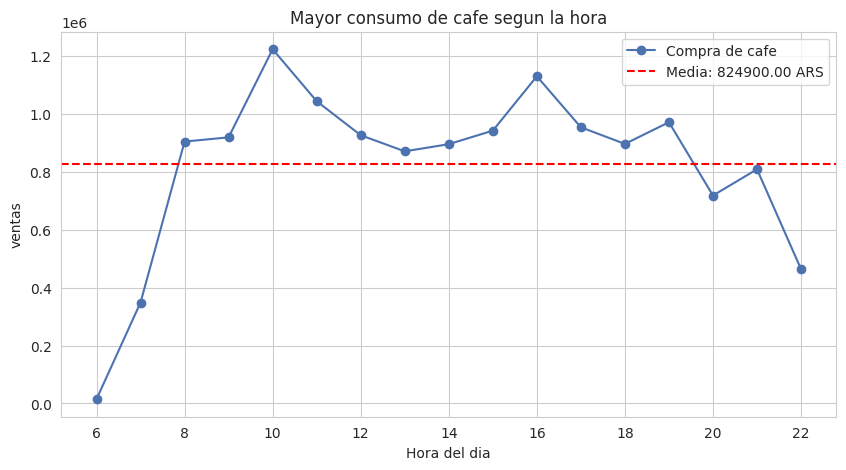

In [31]:


import plotly.express as px


gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
sns.set_style("whitegrid")
sns.set_palette("deep")


plt.figure(figsize=(10,5))
plt.plot(gasto_diario.index, gasto_diario.values, marker="o", label="Compra de cafe")
plt.axhline(media_diaria, color="red", linestyle="--", label=f"Media: {media_diaria:.2f} ARS")
plt.title("Mayor consumo de cafe segun la hora")
plt.xlabel("Hora del dia")
plt.ylabel("ventas")
plt.grid(True)
plt.legend()

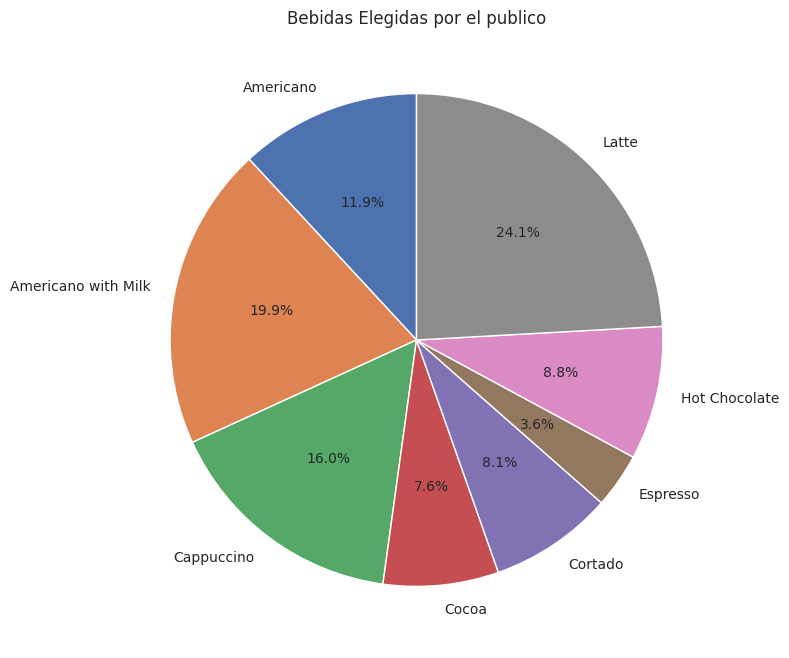

In [32]:

gasto_por_tienda = df.groupby("Nombre del Café")["precio"].sum()
sns.set_style("whitegrid")
sns.set_palette("deep")

# Graficar pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gasto_por_tienda,
    labels=gasto_por_tienda.index,
    autopct="%1.1f%%",  # mostrar porcentajes
    startangle=90
)
plt.title("Bebidas Elegidas por el publico")
plt.show()





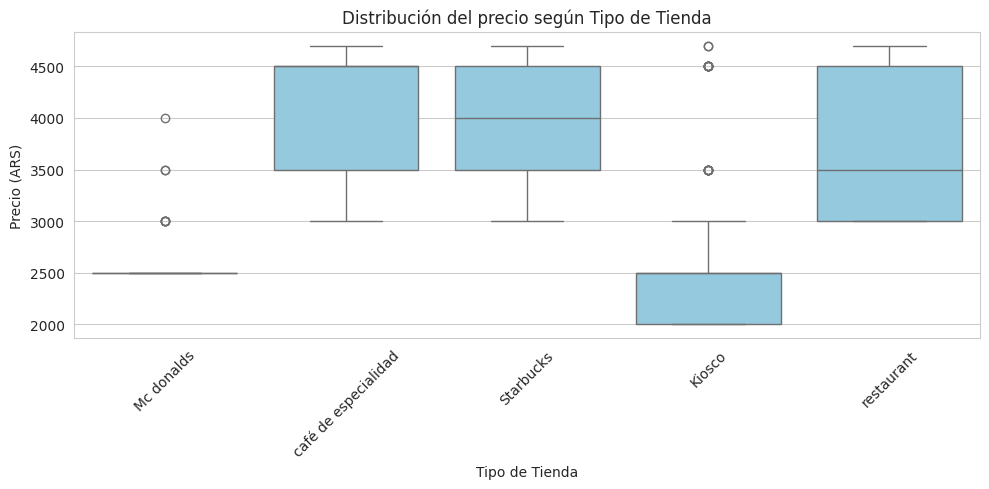

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas categóricas a comparar con el precio
categoricas = ["Tipo de Tienda"]


# Crear un gráfico para cada variable categórica
for col in categoricas:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y="precio", data=df,color="skyblue")
    plt.title(f"Distribución del precio según {col}")
    plt.xlabel(col)
    plt.ylabel("Precio (ARS)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
